<a href="https://colab.research.google.com/github/vanilite/Fake_News_Predict/blob/main/Fake_True_predict_%5BCapstone%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

Anggota 1

Nama:Syahira Azizah Rendra Putri

Kampus:Politeknik Negeri Malang

Jurusan:Sistem Informasi Bisnis

Batch MBKM:Batch 6


Anggota 2

Nama:Try Setiawan Iksan

Kampus:Universitas Sam Ratulangi

Jurusan:Teknik Informatika

Batch MBKM:Batch 6


Anggota 3

Nama:Ulfiatun Khasanah

Kampus:Universitas Amikom Purwokerto  

Jurusan:Teknik Informatika

Batch MBKM:Batch 6


Anggota 4

Nama:Vincent

Kampus:Universitas Mikroskil

Jurusan:Teknik Informatika

Batch MBKM:Batch 6

# **Problem Statement And Background**
Masalah utama yang ingin diatasi oleh proyek ini adalah maraknya penyebaran berita palsu (hoaks) yang dapat menimbulkan dampak negatif bagi individu dan masyarakat. Berita palsu dapat memicu konflik, menyebarkan ketakutan, dan merusak reputasi individu atau lembaga. Selain itu, berita palsu juga dapat mempengaruhi opini publik dan proses pengambilan keputusan. Oleh karena itu, penting untuk mengembangkan solusi yang dapat membantu dalam mengidentifikasi dan memitigasi penyebaran berita palsu secara efektif.

Dataset yang digunakan adalah Fake and Real News Dataset, yang terdiri dari dua kategori utama:
Berita Palsu (Fake News): Artikel berita yang telah diidentifikasi sebagai tidak benar atau menyesatkan.
Berita Nyata (Real News): Artikel berita yang telah diverifikasi dan dianggap akurat.
Dataset ini mencakup teks lengkap dari artikel berita dan label yang menunjukkan apakah berita tersebut palsu atau nyata. Dataset ini menyediakan dasar untuk melatih model supervised learning untuk tugas klasifikasi.

Akurasi: Akurasi yang diharapkan dari model adalah setidaknya 90%. Ini berarti model harus benar dalam mengklasifikasikan setidaknya 90% dari total berita sebagai palsu atau nyata.

Confusion Matrix: Untuk membedakan antara kesalahan positif palsu (false positive) dan negatif palsu (false negative)



# Import Packages

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras import Sequential
from keras.layers import TextVectorization, Embedding, Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import one_hot # Use tensorflow.keras.preprocessing.text instead
from keras.utils import pad_sequences
import nltk
from nltk.stem.snowball import SnowballStemmer
import regex as re
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords, wordnet
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.regularizers import l2
from keras.optimizers import Adam
from nltk.probability import FreqDist
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import altair as alt
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors

import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load Datasets

In [ ]:
df_fake = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/capstone/datasets/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/capstone/datasets/True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Give them the labels

In [ ]:
df_true['status'] = 0
df_fake['status'] = 1

## Merge the 2 datasets..
..and drop the 'subject', 'text', 'date' column

In [ ]:
texts = pd.concat([df_true,df_fake])
texts.drop(['subject','text','date'],axis=1,inplace=True)

## Blend it!

In [ ]:
random_indexes = np.random.randint(0,len(texts),len(texts))
texts = texts.iloc[random_indexes].reset_index(drop=True)

lets see is any null data inside

In [ ]:
texts.isnull().sum()

,0
title,0
status,0


# Cleaning

## Normalize

In [ ]:
def normalize_title(title):
    title = title.lower()
    title = re.sub(r'[^\w\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

In [ ]:
texts['title_cleaned'] = texts['title'].apply(normalize_title)

In [ ]:
texts.head()

,title,status,title_cleaned
0,"Schaeuble to head German parliament, unblockin...",0,schaeuble to head german parliament unblocking...
1,Clinton voices concern about Russian interfere...,0,clinton voices concern about russian interfere...
2,Eleven treated after London museum incident - ...,0,eleven treated after london museum incident am...
3,PELOSI’S HACKED EMAIL SHOWS TOP-SECRET Memo To...,1,pelosis hacked email shows topsecret memo to s...
4,AMERICA IN CRISIS: “Hillary Clinton Is A CRIMI...,1,america in crisis hillary clinton is a crimina...


## Stopwords

In [ ]:
stop_words = stopwords.words('english')

def remove_stopwords(title):
    title = ' '.join(word for word in title.split(' ') if word not in stop_words)
    return title

In [ ]:
texts['title_cleaned'] = texts['title_cleaned'].apply(remove_stopwords)

In [ ]:
texts.head()

,title,status,title_cleaned
0,"Schaeuble to head German parliament, unblockin...",0,schaeuble head german parliament unblocking co...
1,Clinton voices concern about Russian interfere...,0,clinton voices concern russian interference el...
2,Eleven treated after London museum incident - ...,0,eleven treated london museum incident ambulanc...
3,PELOSI’S HACKED EMAIL SHOWS TOP-SECRET Memo To...,1,pelosis hacked email shows topsecret memo staf...
4,AMERICA IN CRISIS: “Hillary Clinton Is A CRIMI...,1,america crisis hillary clinton criminal involv...


## Lemmatize/Stemmer

In [ ]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(title_cleaned):
    word_pos_tags = pos_tag(word_tokenize(title_cleaned)) # Tokenize dan tag pos
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in word_pos_tags]

    return ' '.join(lemmatized_words)

In [ ]:
texts['title_cleaned'] = texts['title_cleaned'].apply(lemmatize_text)

In [ ]:
texts.head()

,title,status,title_cleaned
0,"Schaeuble to head German parliament, unblockin...",0,schaeuble head german parliament unblocking co...
1,Clinton voices concern about Russian interfere...,0,clinton voice concern russian interference ele...
2,Eleven treated after London museum incident - ...,0,eleven treated london museum incident ambulanc...
3,PELOSI’S HACKED EMAIL SHOWS TOP-SECRET Memo To...,1,pelosis hack email show topsecret memo staffer...
4,AMERICA IN CRISIS: “Hillary Clinton Is A CRIMI...,1,america crisis hillary clinton criminal involv...


# EDA

## Distribution Data

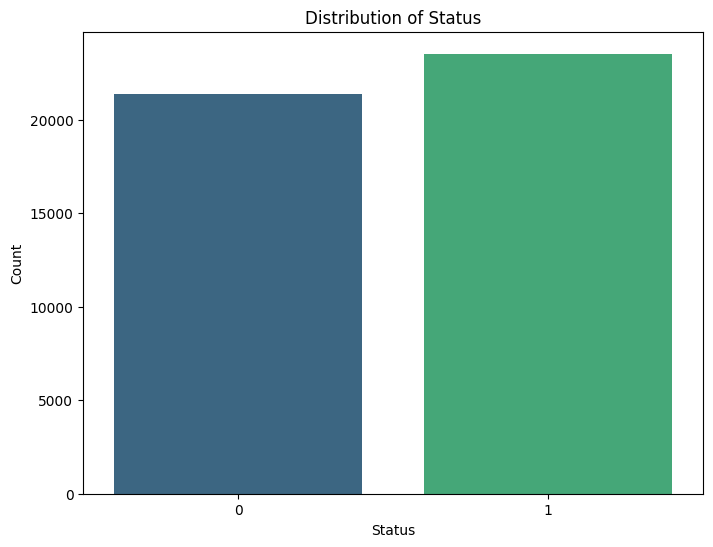

In [ ]:
status_counts = texts['status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

## Search the longest title and count it

In [ ]:
def count_title(title):
    words = title.split()
    return len(title)

texts['title_len'] = texts['title_cleaned'].apply(count_title)

max_title_len = texts['title_len'].max()
longest_sentence = texts.loc[texts['title_len'] == max_title_len, 'title_cleaned'].iloc[0]

print(f"The longest title is: \"{longest_sentence}\"")
print(f"Number of words in the longest sentence: {max_title_len}")

The longest title is: "break updatelast holdout declare war united state governmentliberty deathclive bundy arrest way malheur wildlife refugereverend franklin graham arrive sceneoregon standoff live feedslow motion video lavoy finicum shoot death fbi"
Number of words in the longest sentence: 228


## The freqs of title length

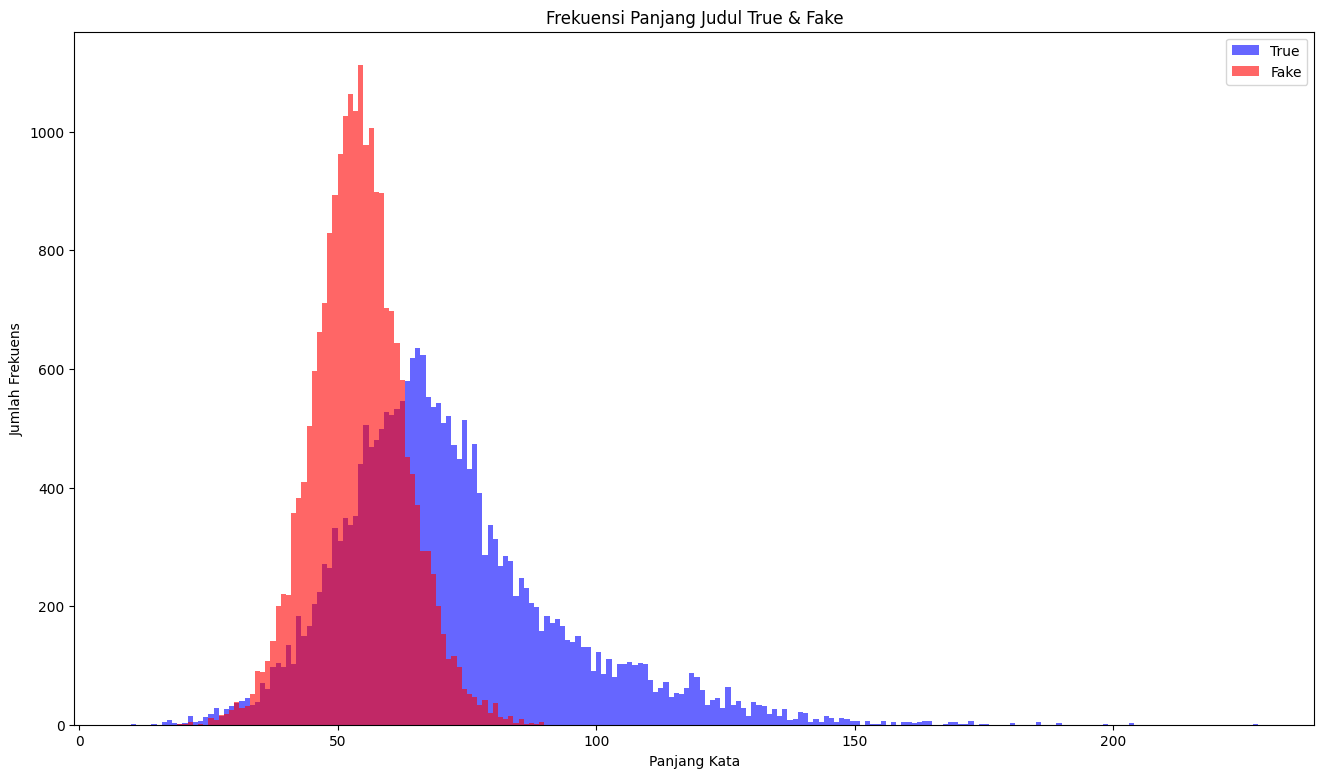

In [ ]:
true_df = texts[texts['status']==1]['title_len']
fake_df = texts[texts['status']==0]['title_len']

fig, ax = plt.subplots(figsize=(16,9))
ax.hist(true_df, bins=range(min(true_df), max(true_df) + 1), alpha=0.6, label='True', color='b')
ax.hist(fake_df, bins=range(min(fake_df), max(fake_df) + 1), alpha=0.6, label='Fake', color='r')

plt.title('Frekuensi Panjang Judul True & Fake')
plt.ylabel('Jumlah Frekuens')
plt.xlabel('Panjang Kata')
plt.legend()
plt.show()

In [ ]:
all_words = ' '.join(texts['title']).split()
word_freq = Counter(all_words)

# Menghitung jumlah kata unik
vocab = set(all_words)
vocab_count = len(vocab)

# Menghitung total frekuensi setiap kata muncul
total_freq = sum(word_freq.values())

# Menghitung rata-rata frekuensi kemunculan setiap kata
average_freq = total_freq / vocab_count

# Menghitung berapa banyak kata unik yang memiliki frekuensi di atas rata-rata
above_average_words = [word for word, freq in word_freq.items() if freq > average_freq]
above_average_count = len(above_average_words)

print("Jumlah kata unik:", vocab_count)
print("Rata-rata frekuensi kemunculan setiap kata:", average_freq)
print("Jumlah kata unik di atas rata-rata frekuensi:", above_average_count)

Jumlah kata unik: 45833
Rata-rata frekuensi kemunculan setiap kata: 12.206837867911768
Jumlah kata unik di atas rata-rata frekuensi: 5893


## Word Cloud

Combined

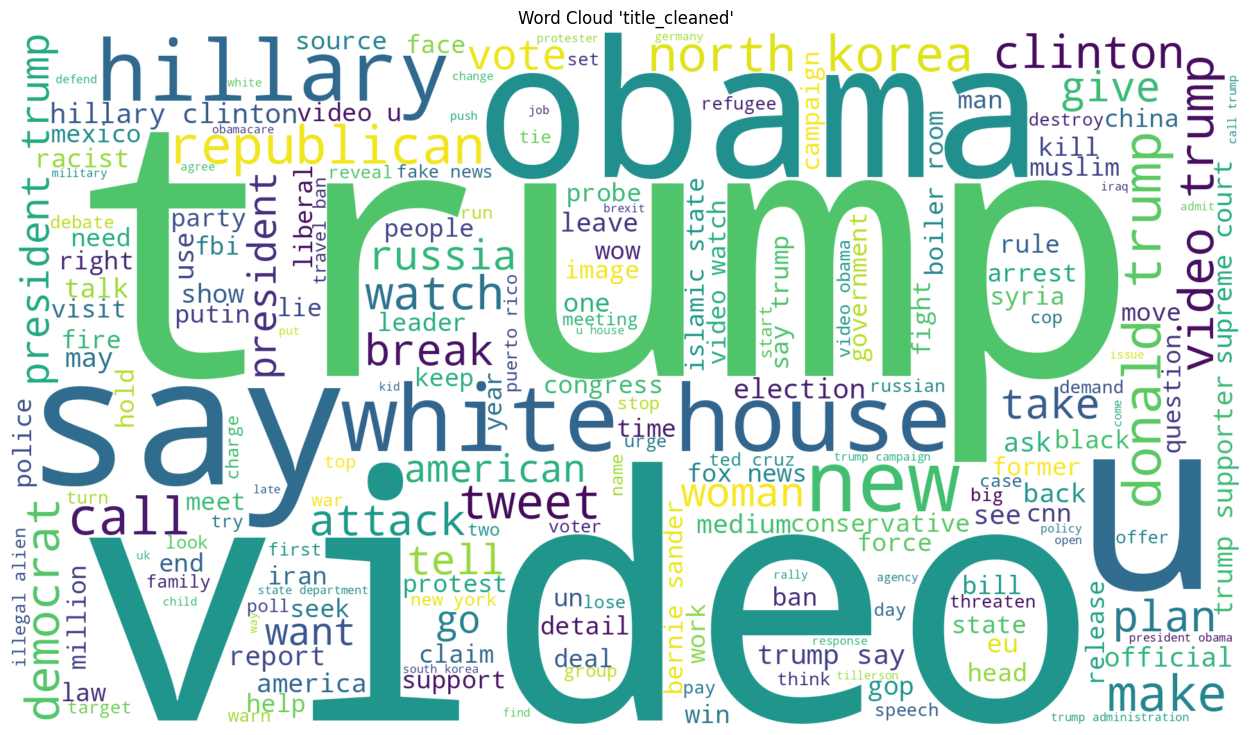

In [ ]:
combine_text = ' '.join(texts['title_cleaned'])
wordcloud_text = WordCloud(width=1920, height=1080, background_color='white').generate(combine_text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title(f"Word Cloud 'title_cleaned'")
plt.axis('off')
plt.show()

True

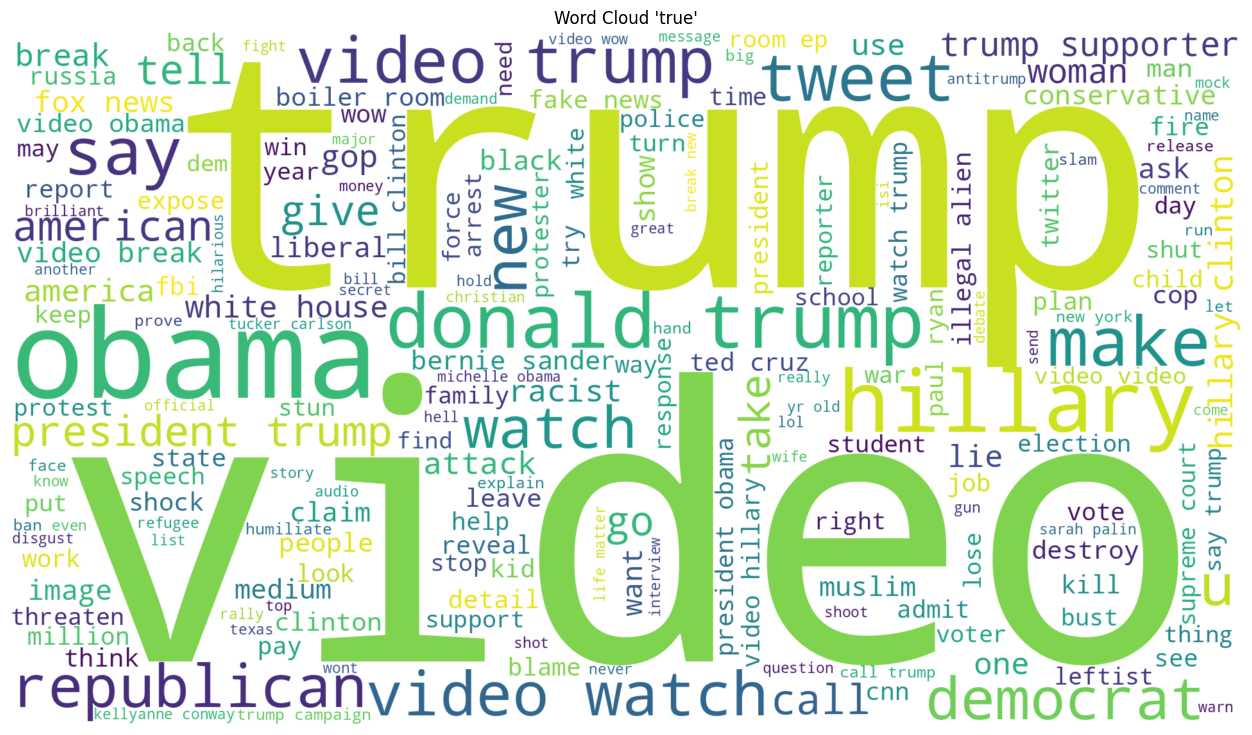

In [ ]:
true_text = texts[texts['status']==1]
combine_text = ' '.join(true_text['title_cleaned'])
wordcloud_text = WordCloud(width=1920, height=1080, background_color='white').generate(combine_text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title(f"Word Cloud 'true'")
plt.axis('off')
plt.show()

Fake

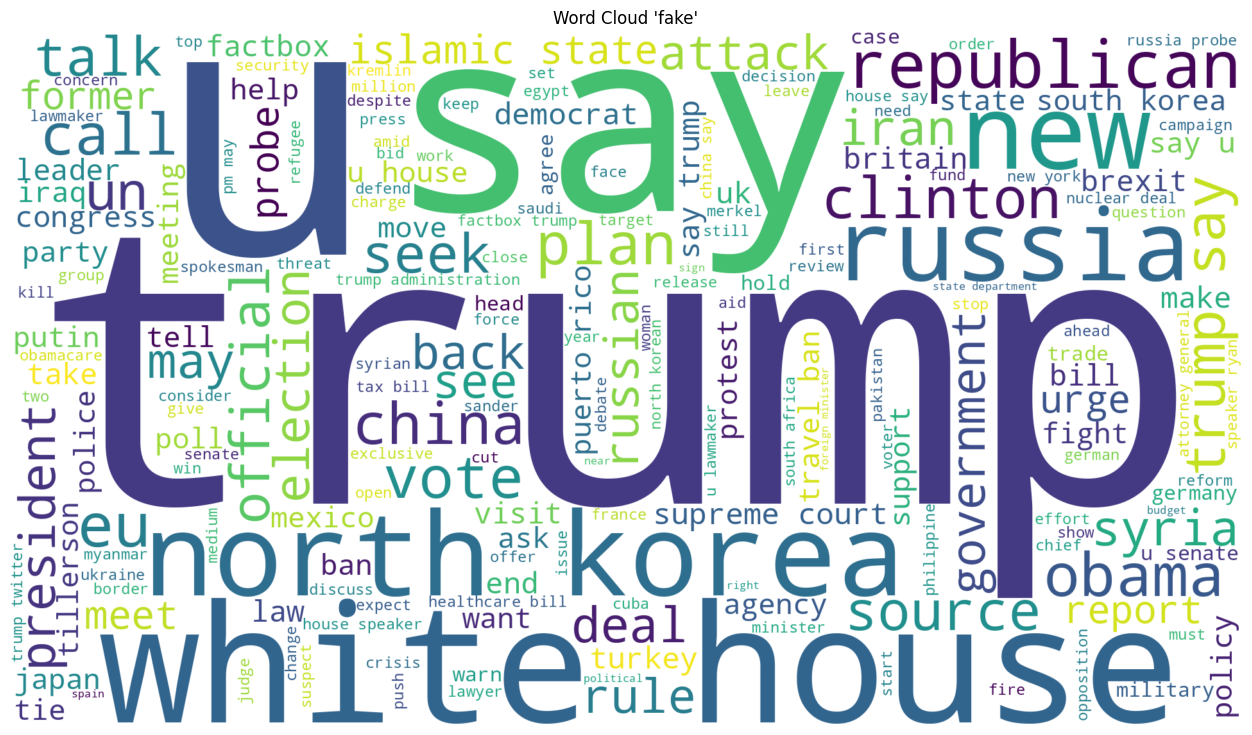

In [ ]:
fake_text = texts[texts['status']==0]
combine_text = ' '.join(fake_text['title_cleaned'])
wordcloud_text = WordCloud(width=1920, height=1080, background_color='white').generate(combine_text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title(f"Word Cloud 'fake'")
plt.axis('off')
plt.show()

# Preprocessing

## Custom Stopwords

In [ ]:
custom_stopwords = ['trump']
stop_words = stop_words + custom_stopwords


def remove_stopwords(title):
    title = ' '.join(word for word in title.split(' ') if word not in stop_words)
    return title

## Split Data

In [ ]:
X = texts['title_cleaned']
y = texts['status']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42,
                                                            stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.1,
                                                  random_state=42,
                                                  stratify=y_train_val)



In [ ]:
print('X Train Size : ', len(X_train))
print('y Train Size : ', len(y_train))
print('X Test Size  : ', len(X_test))
print('y Test Size  : ', len(y_test))
print('X Val Size  : ', len(X_val))
print('y Val Size  : ', len(y_val))

X Train Size :  32326
y Train Size :  32326
X Test Size  :  8980
y Test Size  :  8980
X Val Size  :  3592
y Val Size  :  3592


## Tokenize

In [ ]:
tokenizer = Tokenizer(num_words=5850)
tokenizer.fit_on_texts(X_train)

## Vectorize

In [ ]:
vectorizer = TextVectorization(
    max_tokens=5850,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=100)
vectorizer.adapt(X_train)

X_train_vectorized = vectorizer(X_train)
X_val_vectorized = vectorizer(X_val)
X_test_vectorized = vectorizer(X_test)

# Model

## LSTM

In [ ]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Embedding(input_dim=5850, output_dim=100))
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [ ]:
model_hist = model.fit(X_train_vectorized, y_train, epochs=20, validation_data=(X_val_vectorized, y_val))

Epoch 1/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5206 - loss: 0.6900 - val_accuracy: 0.5239 - val_loss: 0.7651
Epoch 2/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.5158 - loss: 0.6941 - val_accuracy: 0.5239 - val_loss: 0.6969
Epoch 3/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5151 - loss: 0.6941 - val_accuracy: 0.5239 - val_loss: 0.6927
Epoch 4/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.5191 - loss: 0.6929 - val_accuracy: 0.5239 - val_loss: 0.7007
Epoch 5/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5317 - loss: 0.6785 - val_accuracy: 0.5239 - val_loss: 0.9694
Epoch 6/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9537 - loss: 0.1323 - val_accuracy: 0.9644 - val_loss: 0.1412
Epoch 7/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.9527 - val_loss: 0.1670
Epoch 8/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9941 -

## Evaluate

### Accuracy & Loss

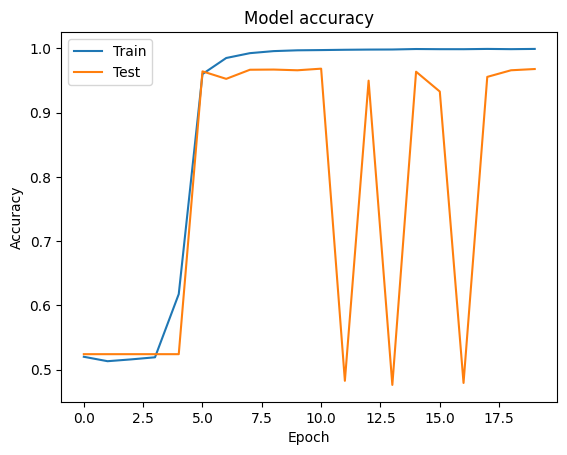

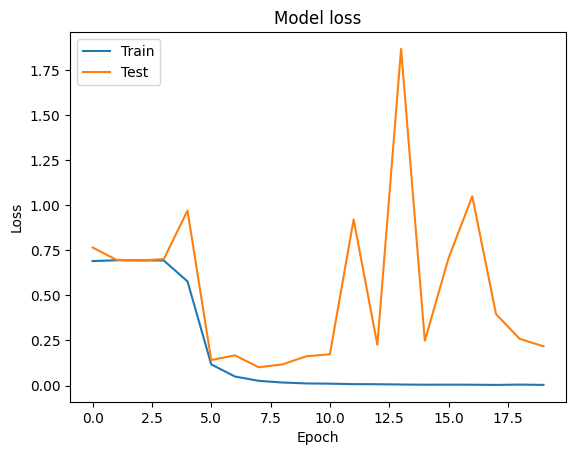

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test_vectorized)
y_pred = np.where(y_pred >0.5, 1, 0)

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


### Confusion Matrix & Classification Report

In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('----------------')
print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[4161  143]
 [ 113 4563]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4304
           1       0.97      0.98      0.97      4676

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



### Predicts

In [ ]:
def predict_processing(*new_title):
    new_title_cleaned = []

    for title in new_title:
      new_title_cleaned.append(normalize_title(title))

    new_title_vect = vectorizer(new_title_cleaned)

    pred = model.predict(new_title_vect)[0][0]

    if pred > 0.5:
        label = "true"
        confidence = pred * 100
    else:
        label = "fake"
        confidence = (1-pred)*100

    return f"{label} (confidence {confidence:.2f}%)"

In [ ]:
new_title = "Trump Just Sent Michelle Obama a Bill She will Never Be able to pay in her lifetime"
prediction = predict_processing(new_title)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
true (confidence 99.99%)


In [ ]:
new_title = "Americans are more concerned over Indians fake open source contribution"
prediction = predict_processing(new_title)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
fake (confidence 100.00%)


## Save Model

In [ ]:
# Menyimpan Model
model.save('model_lstm.h5')

# Menyimpan vectorizer
import pickle
pickle.dump({
    'config': vectorizer.get_config(),
    'weights': vectorizer.get_weights()},
            open("vectorizer.pkl", "wb"))

# Deployment

In [ ]:
# import requests

# # Function to preprocess and predict a single title
# def predict_processing(new_title):
#     # Replace this function with your actual preprocessing and prediction logic
#     # Example placeholder:
#     # new_title_cleaned = [normalize_title(new_title)]
#     # new_title_vect = vectorizer(new_title_cleaned)
#     # pred = model.predict(new_title_vect)[0][0]
#     pred = 0.8  # Example placeholder for prediction score
#     if pred > 0.5:
#         label = "true"
#         confidence = pred * 100
#     else:
#         label = "fake"
#         confidence = (1 - pred) * 100
#     return f"{label} (confidence {confidence:.2f}%)"

# # Example title for prediction
# new_title = "Trump Just Sent Michelle Obama a Bill She will Never Be able to pay in her lifetime"
# prediction = predict_processing(new_title)
# print(prediction)

# # NOTE: Replace with your actual API key from IBM Cloud
# API_KEY = "ZgPsBldj5VeHKHtpo6cQOMr7Uh9UmWVz0TvTUiLJOK4J"

# # Fetching IBM Cloud IAM token
# token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})

# if token_response.status_code == 200:
#     mltoken = token_response.json()["access_token"]
# else:
#     print("Failed to retrieve access token")
#     print(token_response.json())

# header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# # Assuming `data` is a numeric value or array suitable for model input
# data = 0.75  # Replace with actual numeric data suitable for your model input

# payload_scoring = {
#     "input_data": [
#         {
#             "values": [[data]]  # Ensure data is formatted correctly
#         }
#     ]
# }

# # Make the scoring request
# response_scoring = requests.post(
#     'https://jp-tok.ml.cloud.ibm.com/ml/v4/deployments/deploy123/predictions?version=2021-05-01',
#     json=payload_scoring,
#     headers={'Authorization': 'Bearer ' + mltoken}
# )

# # Handle response
# if response_scoring.status_code == 200:
#     print("Scoring response")
#     print(response_scoring.json())
# else:
#     print("Failed to get scoring response")
#     print(response_scoring.json())
